This is Customer Transaction and Demographic related data , It holds Risky and Not Risky customer for specific banking products

Content
Dataset is small in nature , It helps budding data scientist 👨‍🔬 👩‍🔬& Data Analyst to experiment Machine Learning and Statistical modelling concept

Data:
payment_data.csv:
paymentdata.csv: customer’s card payment history. 
id: customer id 
OVDt1: number of times overdue type 1
OVDt2: number of times overdue type 2 
OVDt3: number of times overdue type 3
OVDsum: total overdue days 
paynormal: number of times normal payment
prodcode: credit product code 
prodlimit: credit limit of product
updatedate: account update date 
newbalance: current balance of product
highestbalance: highest balance in history 
reportdate: date of recent payment

customer_data.csv:
customer’s demographic data and category attributes which have been encoded.
Category features are fea1, fea3, fea5, fea6, fea7, fea9.
label is 1, the customer is in high credit risk
label is 0, the customer is in low credit risk

Acknowledgements
Thanks to Google Datasets search

Inspiration
Your data will be in front of the world's largest data science community. What questions do you want to see answered?

This dataset help to find out weather customer is Credit Risky or Credit Worthy in Banking perspective

Q1 - What are the factors contributing to Credit Risky customer ?
Q2 - Behaviour of Credit Worthy Customer ?

In [1]:
#imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading Data

customer_data = pd.read_csv("customer_data.csv")
payment_data = pd.read_csv("payment_data.csv")

In [3]:
print("Number of features in customer_data:", customer_data.shape[0])
print("Number of data points in customer_data:", customer_data.shape[1])
customer_data.head()

Number of features in customer_data: 1125
Number of data points in customer_data: 13


,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
0,1,54982665,5,1245.5,3,77000.0,2,15,5,109,5,151300,244.948974
1,0,59004779,4,1277.0,1,113000.0,2,8,-1,100,3,341759,207.173840
2,0,58990862,7,1298.0,1,110000.0,2,11,-1,101,5,72001,1.000000
3,1,58995168,7,1335.5,1,151000.0,2,11,5,110,3,60084,1.000000
4,0,54987320,7,NaN,2,59000.0,2,11,5,108,4,450081,197.403141


In [4]:
print("Number of features in payment_data:", payment_data.shape[0])
print("Number of data points in payment_data:", payment_data.shape[1])
payment_data.head()

Number of features in payment_data: 8250
Number of data points in payment_data: 12


,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,highest_balance,report_date
0,58987402,0,0,0,0,1,10,16500.0,04/12/2016,0.0,NaN,NaN
1,58995151,0,0,0,0,1,5,NaN,04/12/2016,588720.0,491100.0,NaN
2,58997200,0,0,0,0,2,5,NaN,04/12/2016,840000.0,700500.0,22/04/2016
3,54988608,0,0,0,0,3,10,37400.0,03/12/2016,8425.2,7520.0,25/04/2016
4,54987763,0,0,0,0,2,10,NaN,03/12/2016,15147.6,NaN,26/04/2016


In [5]:
# Data Statistics

print(customer_data.info())
customer_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB
None


,label,id,fea_1,fea_2,fea_3,fea_4,fea_5,fea_6,fea_7,fea_8,fea_9,fea_10,fea_11
count,1125.000000,1.125000e+03,1125.000000,976.000000,1125.000000,1.125000e+03,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,0.200000,5.783677e+07,5.482667,1283.911373,2.333333,1.208836e+05,1.928889,10.872000,4.832889,100.802667,4.195556,164618.495111,134.999004
std,0.400178,1.817150e+06,1.383338,51.764022,0.878773,8.844523e+04,0.257125,2.676437,2.971182,11.988955,0.855679,152520.488281,112.616798
min,0.000000,5.498235e+07,1.000000,1116.500000,1.000000,1.500000e+04,1.000000,3.000000,-1.000000,64.000000,1.000000,60000.000000,1.000000
25%,0.000000,5.499050e+07,4.000000,1244.000000,1.000000,7.200000e+04,2.000000,8.000000,5.000000,90.000000,3.000000,60044.000000,1.000000
50%,0.000000,5.898975e+07,5.000000,1281.500000,3.000000,1.020000e+05,2.000000,11.000000,5.000000,105.000000,4.000000,72000.000000,173.205081
75%,0.000000,5.899799e+07,7.000000,1314.500000,3.000000,1.390000e+05,2.000000,11.000000,5.000000,111.000000,5.000000,151307.000000,202.484567
max,1.000000,5.900624e+07,7.000000,1481.000000,3.000000,1.200000e+06,2.000000,16.000000,10.000000,115.000000,5.000000,650070.000000,707.106781


In [6]:
# Data Statistics


print(payment_data.info())
payment_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
dtypes: float64(3), int64(7), object(2)
memory usage: 773.6+ KB
None


,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,new_balance,highest_balance
count,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,2132.000000,8.250000e+03,7.841000e+03
mean,5.782173e+07,0.249091,0.127152,0.369212,187.681697,14.526667,8.232000,85789.702205,1.054042e+05,2.192027e+05
std,1.822724e+06,1.250197,0.860046,2.900320,1804.232570,12.053627,3.533055,74345.828184,1.887704e+06,2.814536e+06
min,5.498235e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.100000,-4.030320e+04,5.010000e+02
25%,5.499050e+07,0.000000,0.000000,0.000000,0.000000,4.000000,6.000000,37400.000000,0.000000e+00,2.345300e+04
50%,5.898905e+07,0.000000,0.000000,0.000000,0.000000,11.000000,10.000000,68200.000000,0.000000e+00,4.404700e+04
75%,5.899655e+07,0.000000,0.000000,0.000000,0.000000,25.000000,10.000000,112200.000000,2.494800e+04,1.005000e+05
max,5.900624e+07,34.000000,34.000000,35.000000,31500.000000,36.000000,27.000000,660000.000000,1.632120e+08,1.800005e+08


In [7]:
def data_profile(df):
    stats = []
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
    stats_df.sort_values('Percentage of missing values', ascending=True)
    return stats_df

In [8]:
data_profile(payment_data)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,id,1125,0.000000,0.666667,int64
1,OVD_t1,21,0.000000,90.606061,int64
2,OVD_t2,16,0.000000,95.587879,int64
3,OVD_t3,33,0.000000,96.763636,int64
4,OVD_sum,393,0.000000,88.848485,int64
5,pay_normal,37,0.000000,11.030303,int64
6,prod_code,21,0.000000,54.824242,int64
7,prod_limit,321,74.157576,74.157576,float64
8,update_date,3041,0.315152,0.315152,object
9,new_balance,3939,0.000000,46.836364,float64


In [9]:
data_profile(customer_data)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,label,2,0.000000,80.000000,int64
1,id,1125,0.000000,0.088889,int64
2,fea_1,6,0.000000,42.311111,int64
3,fea_2,158,13.244444,13.244444,float64
4,fea_3,3,0.000000,60.800000,int64
5,fea_4,229,0.000000,3.022222,float64
6,fea_5,2,0.000000,92.888889,int64
7,fea_6,10,0.000000,41.333333,int64
8,fea_7,10,0.000000,61.244444,int64
9,fea_8,52,0.000000,8.711111,int64


In [10]:
# Joining datasets

data = payment_data.merge(customer_data, how= 'inner', on = "id")

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8250 entries, 0 to 8249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8250 non-null   int64  
 1   OVD_t1           8250 non-null   int64  
 2   OVD_t2           8250 non-null   int64  
 3   OVD_t3           8250 non-null   int64  
 4   OVD_sum          8250 non-null   int64  
 5   pay_normal       8250 non-null   int64  
 6   prod_code        8250 non-null   int64  
 7   prod_limit       2132 non-null   float64
 8   update_date      8224 non-null   object 
 9   new_balance      8250 non-null   float64
 10  highest_balance  7841 non-null   float64
 11  report_date      7136 non-null   object 
 12  label            8250 non-null   int64  
 13  fea_1            8250 non-null   int64  
 14  fea_2            7222 non-null   float64
 15  fea_3            8250 non-null   int64  
 16  fea_4            8250 non-null   float64
 17  fea_5         

In [12]:
#changing the date type into datetime

data['update_date'] =  pd.to_datetime(data['update_date'])
data['report_date'] = pd.to_datetime(data['report_date'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8250 entries, 0 to 8249
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               8250 non-null   int64         
 1   OVD_t1           8250 non-null   int64         
 2   OVD_t2           8250 non-null   int64         
 3   OVD_t3           8250 non-null   int64         
 4   OVD_sum          8250 non-null   int64         
 5   pay_normal       8250 non-null   int64         
 6   prod_code        8250 non-null   int64         
 7   prod_limit       2132 non-null   float64       
 8   update_date      8224 non-null   datetime64[ns]
 9   new_balance      8250 non-null   float64       
 10  highest_balance  7841 non-null   float64       
 11  report_date      7136 non-null   datetime64[ns]
 12  label            8250 non-null   int64         
 13  fea_1            8250 non-null   int64         
 14  fea_2            7222 non-null   float64

In [14]:
# checking null values

isnull = pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100,2), columns = ["null_percentage"])
isnull

,null_percentage
id,0.00
OVD_t1,0.00
OVD_t2,0.00
OVD_t3,0.00
OVD_sum,0.00
pay_normal,0.00
prod_code,0.00
prod_limit,74.16
update_date,0.32
new_balance,0.00


In [15]:
#Number of categorical features
summarystats_categorical_feat = []
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
summarystats_categorical_feat = [[feature, len(data[feature].unique())] for feature in categorical_feature]
df = pd.DataFrame(summarystats_categorical_feat, columns=["Features", "Unique Categories"])
df

,Features,Unique Categories


In [16]:
from scipy import stats
from scipy.stats import norm, skew
data_copy = data.copy()
data_copy = data_copy.drop(['update_date','report_date'], axis = 1)


numeric_feats = data_copy.dtypes[data_copy.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
new_balance,79.063003
highest_balance,47.709505
OVD_t2,15.315246
OVD_sum,13.089454
OVD_t1,11.348016
OVD_t3,9.642847
fea_4,3.265697
prod_limit,2.666419
label,1.774877
fea_10,0.917269


In [17]:
data_profile(data)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,id,1125,0.000000,0.666667,int64
1,OVD_t1,21,0.000000,90.606061,int64
2,OVD_t2,16,0.000000,95.587879,int64
3,OVD_t3,33,0.000000,96.763636,int64
4,OVD_sum,393,0.000000,88.848485,int64
5,pay_normal,37,0.000000,11.030303,int64
6,prod_code,21,0.000000,54.824242,int64
7,prod_limit,321,74.157576,74.157576,float64
8,update_date,3041,0.315152,0.315152,datetime64[ns]
9,new_balance,3939,0.000000,46.836364,float64


# prod_limit

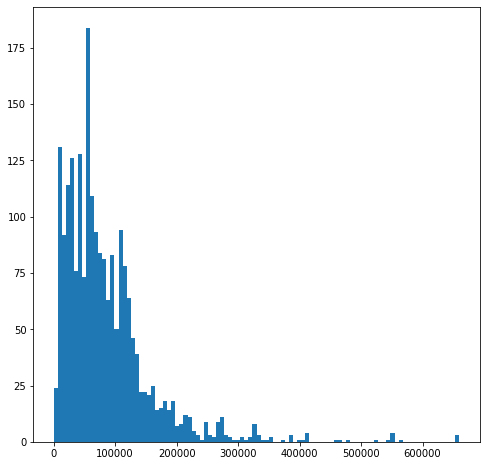

In [18]:
plt.figure(figsize = (8,8))
plt.hist(data['prod_limit'], bins= 100)
plt.show()

In [19]:
data['prod_limit'] = data['prod_limit'].replace(np.nan, data['prod_limit'].mean())

# highest_balance

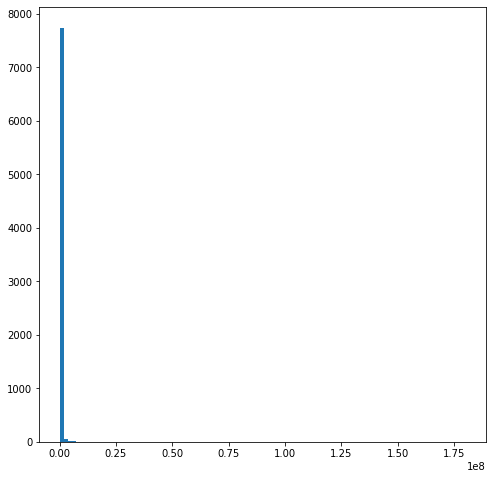

In [20]:
plt.figure(figsize = (8,8))
plt.hist(data['highest_balance'], bins= 100)
plt.show()

In [21]:
data['highest_balance'] = data['highest_balance'].replace(np.nan, data['highest_balance'].mean())

C:\Users\sonal\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 219202.73 and sigma = 2743708.24



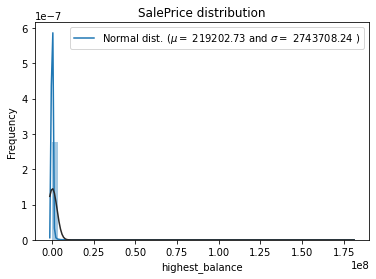

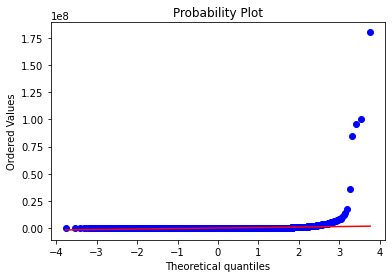

In [22]:
sns.distplot(data['highest_balance'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['highest_balance'] )
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['highest_balance'], plot=plt)
plt.show()

C:\Users\sonal\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 85789.70 and sigma = 37785.17



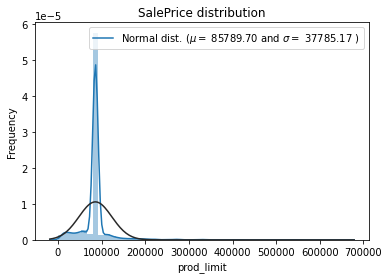

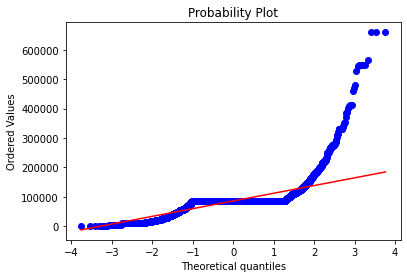

In [23]:
sns.distplot(data['prod_limit'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['prod_limit'] )
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['prod_limit'], plot=plt)
plt.show()

# feat_2

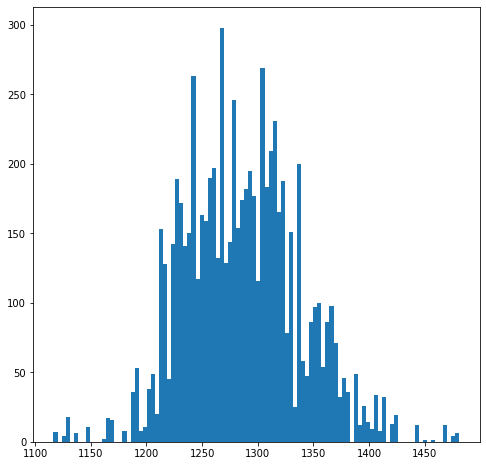

In [24]:
plt.figure(figsize = (8,8))
plt.hist(data['fea_2'], bins= 100)
plt.show()
data['fea_2'] = data['fea_2'].replace(np.nan, data['fea_2'].mean())

C:\Users\sonal\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 1286.16 and sigma = 48.65



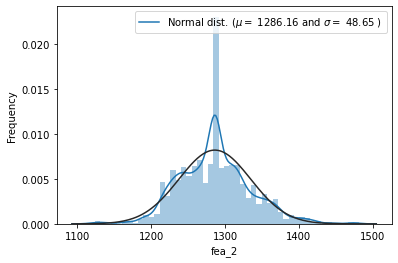

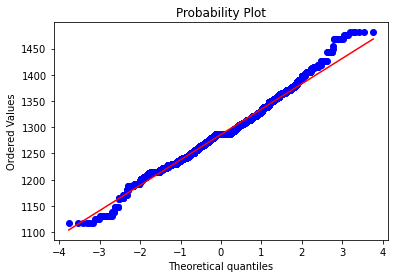

In [25]:
sns.distplot(data['fea_2'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['fea_2'] )
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')


#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['fea_2'], plot=plt)
plt.show()

In [26]:
# checking null values

isnull = pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100,2), columns = ["null_percentage"])
data = data.dropna()
data.shape

(7134, 24)

In [27]:
# checking null values

isnull = pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100,2), columns = ["null_percentage"])
isnull

,null_percentage
id,0.0
OVD_t1,0.0
OVD_t2,0.0
OVD_t3,0.0
OVD_sum,0.0
pay_normal,0.0
prod_code,0.0
prod_limit,0.0
update_date,0.0
new_balance,0.0


# report_date 

In [28]:
data['report_year'] = data['report_date'].dt.year
data['report_month'] = data['report_date'].dt.month
data['report_day'] = data['report_date'].dt.day


data['update_year'] = data['update_date'].dt.year
data['update_month'] = data['update_date'].dt.month
data['update_day'] = data['update_date'].dt.day

In [29]:
data.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,...,fea_8,fea_9,fea_10,fea_11,report_year,report_month,report_day,update_year,update_month,update_day
2,58987402,0,0,0,0,2,10,113300.000000,2016-02-13,7938.0,...,95,4,60023,1.000000,2016,3,24,2016,2,13
3,58987402,0,0,0,0,9,10,85789.702205,2015-07-27,30039.6,...,95,4,60023,1.000000,2016,4,8,2015,7,27
8,58995151,0,0,0,0,1,6,85789.702205,2016-04-03,41706.0,...,115,4,450028,224.267697,2016,4,3,2016,4,3
9,58995151,0,0,0,0,3,7,85789.702205,2013-01-07,0.0,...,115,4,450028,224.267697,2013,5,5,2013,1,7
10,58995151,0,0,0,0,29,1,85789.702205,2011-12-27,187878.0,...,115,4,450028,224.267697,2014,2,21,2011,12,27


# Exploratory Data Analysis

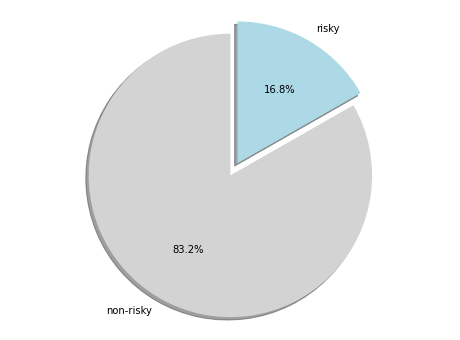

In [30]:
labels = 'non-risky', 'risky'
sizes = [data.label[data['label']==0].count(), \
         data.label[data['label']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = ['lightgrey', 'lightblue'])
ax1.axis('equal')
plt.title("", size = 20)
plt.show()

In [31]:
risky_df = data[data['label']==1]
risky_df

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,...,fea_8,fea_9,fea_10,fea_11,report_year,report_month,report_day,update_year,update_month,update_day
8,58995151,0,0,0,0,1,6,85789.702205,2016-04-03,41706.0,...,115,4,450028,224.267697,2016,4,3,2016,4,3
9,58995151,0,0,0,0,3,7,85789.702205,2013-01-07,0.0,...,115,4,450028,224.267697,2013,5,5,2013,1,7
10,58995151,0,0,0,0,29,1,85789.702205,2011-12-27,187878.0,...,115,4,450028,224.267697,2014,2,21,2011,12,27
12,58995151,0,0,35,6164,1,5,85789.702205,2010-01-11,0.0,...,115,4,450028,224.267697,2012,10,17,2010,1,11
13,58995151,0,0,0,0,1,10,85789.702205,2009-05-25,0.0,...,115,4,450028,224.267697,2011,3,23,2009,5,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,58987715,3,4,0,331,28,10,28600.000000,2009-12-02,28980.0,...,76,5,60063,1.000000,2016,3,22,2009,12,2
8158,58987715,0,0,0,0,0,10,85789.702205,2003-08-31,0.0,...,76,5,60063,1.000000,2006,3,22,2003,8,31
8159,58987715,2,7,0,397,18,10,85789.702205,2002-03-23,0.0,...,76,5,60063,1.000000,2014,9,13,2002,3,23
8166,59000336,0,0,0,0,36,5,85789.702205,2010-12-01,0.0,...,90,5,60014,1.000000,2015,11,4,2010,12,1


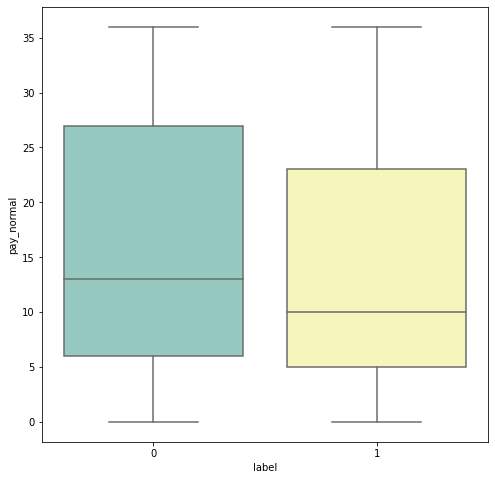

In [32]:
plt.figure(figsize=(8,8)) 
ax = sns.boxplot(x="label", y="pay_normal", data=data, palette="Set3")

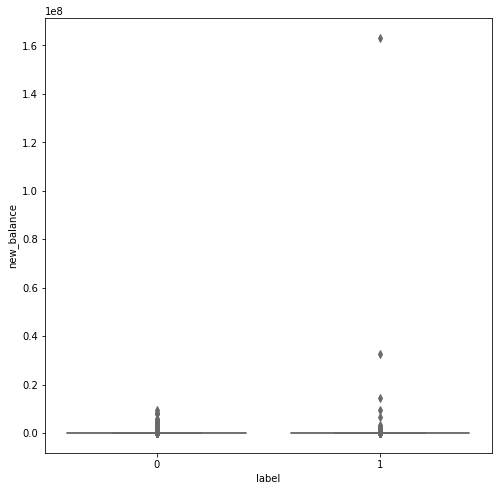

In [33]:
plt.figure(figsize=(8,8)) 
ax = sns.boxplot(x="label", y="new_balance", data=data, palette="Set3")

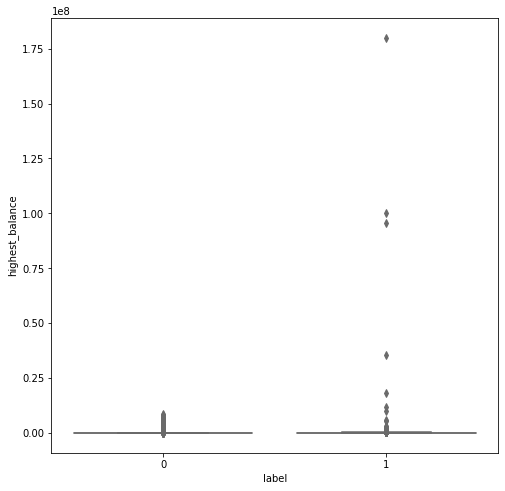

In [34]:
plt.figure(figsize=(8,8)) 
ax = sns.boxplot(x="label", y="highest_balance", data=data, palette="Set3")

In [35]:
data['last_report'] = max(data['report_date']) - data['report_date']

In [36]:
data.head()

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,...,fea_9,fea_10,fea_11,report_year,report_month,report_day,update_year,update_month,update_day,last_report
2,58987402,0,0,0,0,2,10,113300.000000,2016-02-13,7938.0,...,4,60023,1.000000,2016,3,24,2016,2,13,85 days
3,58987402,0,0,0,0,9,10,85789.702205,2015-07-27,30039.6,...,4,60023,1.000000,2016,4,8,2015,7,27,70 days
8,58995151,0,0,0,0,1,6,85789.702205,2016-04-03,41706.0,...,4,450028,224.267697,2016,4,3,2016,4,3,75 days
9,58995151,0,0,0,0,3,7,85789.702205,2013-01-07,0.0,...,4,450028,224.267697,2013,5,5,2013,1,7,1139 days
10,58995151,0,0,0,0,29,1,85789.702205,2011-12-27,187878.0,...,4,450028,224.267697,2014,2,21,2011,12,27,847 days


Text(0, 0.5, 'count')

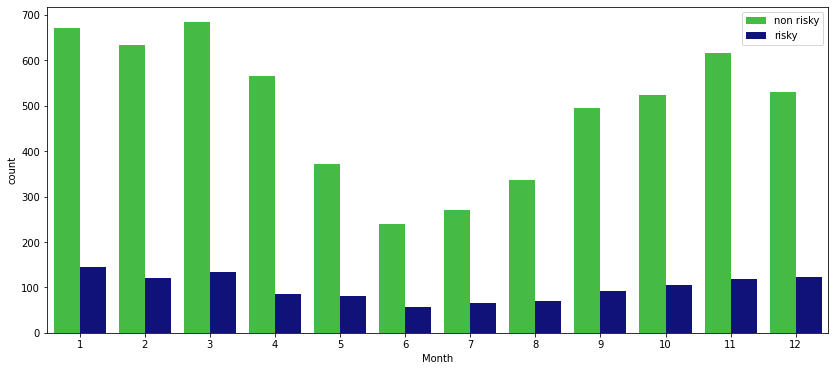

In [37]:
#countplot

plt.figure(figsize=(14, 6))

sns.countplot(x='report_month', hue = 'label',data = data, \
              palette=['limegreen', 'darkblue'])
plt.xlabel("Month")
plt.legend(['non risky', 'risky'], loc='upper right')
plt.ylabel("count")


Text(0, 0.5, 'count')

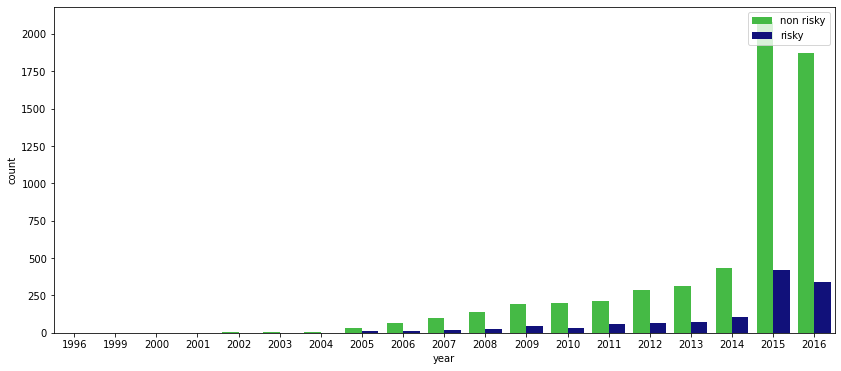

In [38]:
#countplot

plt.figure(figsize=(14, 6))

sns.countplot(x='report_year', hue = 'label',data = data, \
              palette=['limegreen', 'darkblue'])
plt.xlabel("year")
plt.legend(['non risky', 'risky'], loc='upper right')
plt.ylabel("count")

Text(0, 0.5, 'count')

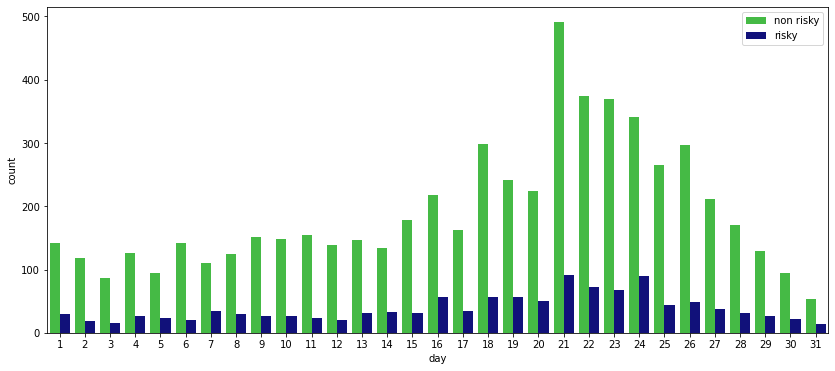

In [39]:
#countplot

plt.figure(figsize=(14, 6))

sns.countplot(x='report_day', hue = 'label',data = data, \
              palette=['limegreen', 'darkblue'])
plt.xlabel("day")
plt.legend(['non risky', 'risky'], loc='upper right')
plt.ylabel("count")

In [40]:
#countplot
data['last_report'] = (data['last_report'] / np.timedelta64(1, 'D')).astype(int)

727.8552004485562


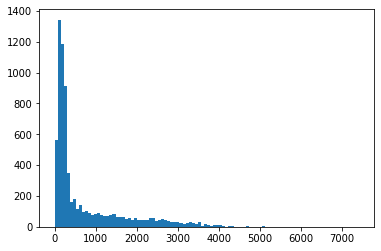

In [41]:
print(data['last_report'].mean())
plt.hist(data['last_report'], bins =100)
plt.show()

726.7246861924687


C:\Users\sonal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


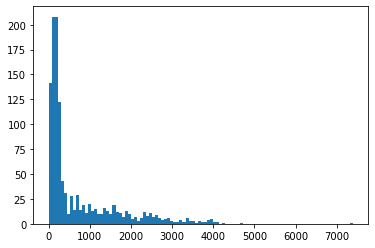

In [42]:
risky_df['last_report'] = max(risky_df['report_date']) - risky_df['report_date']
risky_df['last_report'] = (risky_df['last_report'] / np.timedelta64(1, 'D')).astype(int)
print(risky_df['last_report'].mean())
plt.hist(risky_df['last_report'], bins =100)
plt.show()

In [43]:
riskydf_lastreport = risky_df[risky_df['last_report'] > 727]
riskydf_lastreport

,id,OVD_t1,OVD_t2,OVD_t3,OVD_sum,pay_normal,prod_code,prod_limit,update_date,new_balance,...,fea_9,fea_10,fea_11,report_year,report_month,report_day,update_year,update_month,update_day,last_report
9,58995151,0,0,0,0,3,7,85789.702205,2013-01-07,0.0,...,4,450028,224.267697,2013,5,5,2013,1,7,1114
10,58995151,0,0,0,0,29,1,85789.702205,2011-12-27,187878.0,...,4,450028,224.267697,2014,2,21,2011,12,27,822
12,58995151,0,0,35,6164,1,5,85789.702205,2010-01-11,0.0,...,4,450028,224.267697,2012,10,17,2010,1,11,1314
13,58995151,0,0,0,0,1,10,85789.702205,2009-05-25,0.0,...,4,450028,224.267697,2011,3,23,2009,5,25,1888
14,58995151,0,0,6,2160,21,10,85789.702205,2009-04-29,0.0,...,4,450028,224.267697,2012,6,1,2009,4,29,1452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8116,58982754,0,0,0,0,7,10,85789.702205,2003-12-28,0.0,...,3,60033,240.831892,2005,2,8,2003,12,28,4122
8117,58982754,0,0,0,0,0,0,85789.702205,2003-01-18,0.0,...,3,60033,240.831892,2008,7,14,2003,1,18,2870
8155,58987715,1,6,0,480,29,10,22000.000000,2010-11-05,-99.6,...,5,60063,1.000000,2014,2,15,2010,11,5,828
8158,58987715,0,0,0,0,0,10,85789.702205,2003-08-31,0.0,...,5,60063,1.000000,2006,3,22,2003,8,31,3715


In [44]:
max(data['new_balance'])

print(data[data['new_balance'] == max(data['new_balance'])])


            id  OVD_t1  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  \
7237  58989344       0       0       0        0          11          2   

        prod_limit update_date  new_balance  ...  fea_9  fea_10      fea_11  \
7237  85789.702205  2014-01-16  163211958.0  ...      5  350704  316.227766   

      report_year  report_month  report_day  update_year  update_month  \
7237         2014            11           2         2014             1   

      update_day  last_report  
7237          16          593  

[1 rows x 31 columns]


In [45]:
print(data[data['highest_balance'] == max(data['highest_balance'])])

            id  OVD_t1  OVD_t2  OVD_t3  OVD_sum  pay_normal  prod_code  \
7237  58989344       0       0       0        0          11          2   

        prod_limit update_date  new_balance  ...  fea_9  fea_10      fea_11  \
7237  85789.702205  2014-01-16  163211958.0  ...      5  350704  316.227766   

      report_year  report_month  report_day  update_year  update_month  \
7237         2014            11           2         2014             1   

      update_day  last_report  
7237          16          593  

[1 rows x 31 columns]


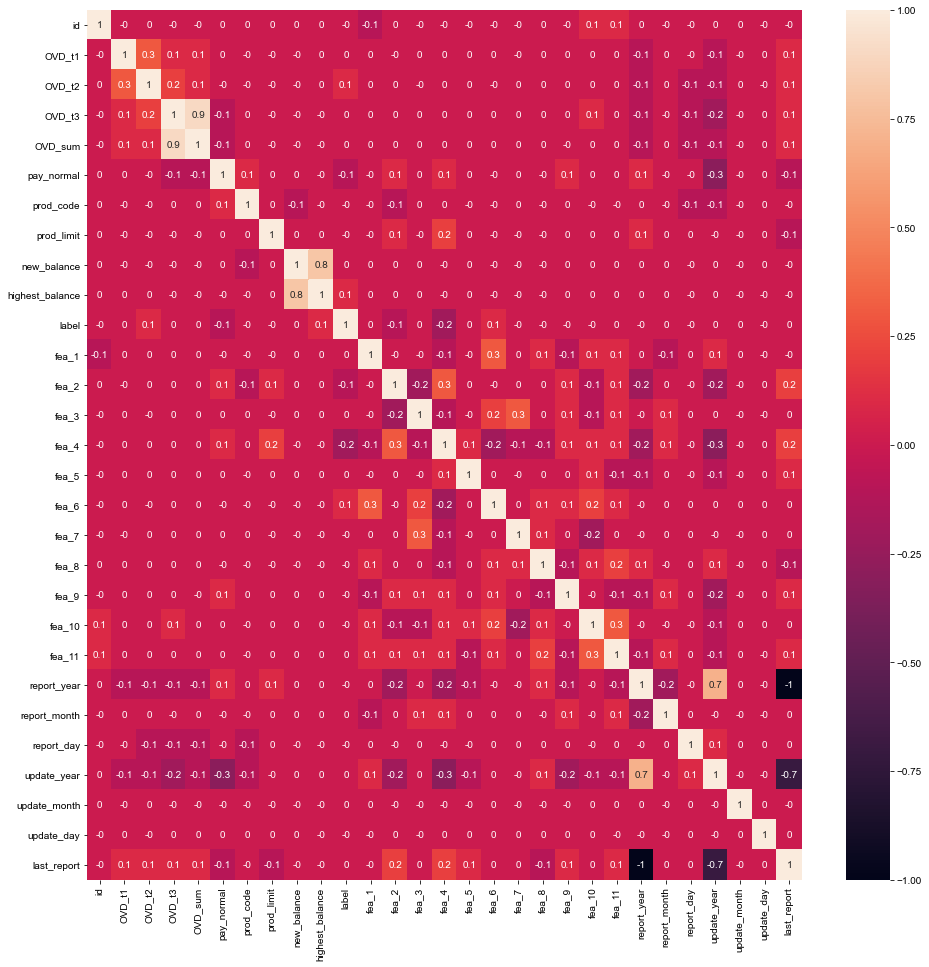

In [46]:
plt.figure(figsize=(16,16))
corrMatrix = round(data.corr(), 1)
sns.heatmap(corrMatrix, annot = True)
sns.set(font_scale=0.5)
plt.show()

In [47]:
from scipy import stats
from scipy.stats import norm, skew
data_copy = data.copy()
data_copy = data_copy.drop(['update_date','report_date'], axis = 1)


numeric_feats = data_copy.dtypes[data_copy.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
new_balance,75.057060
highest_balance,51.235110
OVD_t2,15.899752
OVD_sum,12.323180
OVD_t1,11.749774
OVD_t3,9.105379
prod_limit,5.241893
fea_4,3.097332
last_report,1.818836
label,1.780755


In [48]:
data_mod = data.copy()

# Modeling

In [49]:
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from collections import Counter

from tensorflow import keras

In [50]:
data_mod = data_mod.drop(['update_date','report_date','id','highest_balance', 'OVD_t3', 'update_year', 'report_year', 'update_month', 'update_day', 'report_month', 'report_day'], axis =1)

In [51]:
y = data_mod.loc[:,'label']
data_mod = data_mod.drop(['label'], axis = 1)
X = data_mod
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify= y, test_size=0.20, random_state=42)
print(X_train.shape,y_train.shape)
print(X_val.shape, y_val.shape)
X_train = X_train.reset_index(drop =True)
y_train = y_train.reset_index(drop = True)
X_val = X_val.reset_index(drop = True)
y_val = y_val.reset_index(drop = True)

(5707, 19) (5707,)
(1427, 19) (1427,)


In [60]:
# fit a logistic regression model to the data
def logisticRegression(train_x, train_y,test_x, test_y):
  model = LogisticRegression(max_iter = 1000, random_state= 42, class_weight='auto')
  model.fit(train_x, train_y)
  print(model)
  # make predictions
  expected = test_y
  predicted = model.predict(test_x)
  # summarize the fit of the model
  print(classification_report(expected, predicted))
  print(confusion_matrix(expected, predicted))
  disp = plot_confusion_matrix(model, test_x, test_y,
                                 cmap=plt.cm.Blues)
  disp.ax_.set_title("Confusion Matrix")
  plt.figure(figsize=(10,6))
  sns.set(font_scale=2)
  print("Confusion Matrix")
  plt.show()

LogisticRegression(class_weight='auto', max_iter=1000, random_state=42)
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1188
           1       0.00      0.00      0.00       239

    accuracy                           0.83      1427
   macro avg       0.42      0.50      0.45      1427
weighted avg       0.69      0.83      0.76      1427

[[1185    3]
 [ 239    0]]
Confusion Matrix


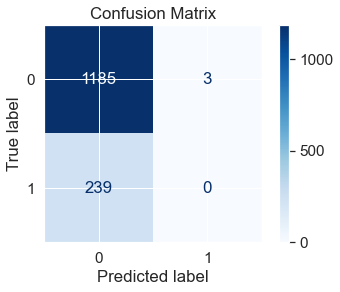

<Figure size 720x432 with 0 Axes>

None


In [61]:
print(logisticRegression(X_train, y_train, X_val, y_val))

In [62]:
def randomForest(train_x, train_y,test_x, test_y):
  clf = RandomForestClassifier(n_estimators = 10, max_depth =35, random_state=0)
  clf.fit(train_x,train_y)
  print(classification_report(test_y, clf.predict(test_x)))
  print(confusion_matrix(test_y, clf.predict(test_x)))
  disp = plot_confusion_matrix(clf, test_x, test_y,
                                 cmap=plt.cm.Blues)
  disp.ax_.set_title("Confusion Matrix")
  plt.figure(figsize=(10,6))
  sns.set(font_scale=2)
  print("Confusion Matrix")
  plt.show()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1188
           1       1.00      0.72      0.83       239

    accuracy                           0.95      1427
   macro avg       0.97      0.86      0.90      1427
weighted avg       0.95      0.95      0.95      1427

[[1188    0]
 [  68  171]]
Confusion Matrix


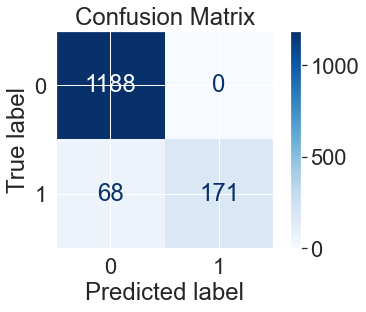

<Figure size 720x432 with 0 Axes>

None


In [63]:
print(randomForest(X_train, y_train, X_val, y_val))

In [56]:
!pip install imblearn

In [57]:
from imblearn.over_sampling import BorderlineSMOTE, SMOTE, SVMSMOTE, SMOTENC, ADASYN
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
counter = Counter(y_resampled)
print(counter)

Counter({0: 4751, 1: 4751})


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1188
           1       0.90      0.76      0.82       239

    accuracy                           0.95      1427
   macro avg       0.92      0.87      0.90      1427
weighted avg       0.94      0.95      0.94      1427

[[1167   21]
 [  57  182]]
Confusion Matrix


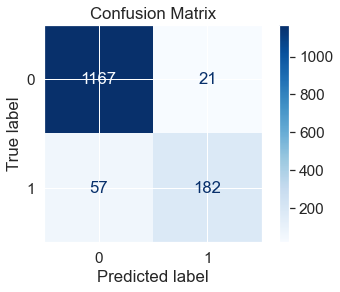

<Figure size 720x432 with 0 Axes>

None


In [58]:
print(randomForest(X_resampled, y_resampled, X_val, y_val))

LogisticRegression(class_weight='auto', max_iter=1000, random_state=42)
              precision    recall  f1-score   support

           0       0.89      0.50      0.64      1188
           1       0.22      0.68      0.33       239

    accuracy                           0.53      1427
   macro avg       0.55      0.59      0.49      1427
weighted avg       0.77      0.53      0.59      1427

[[598 590]
 [ 76 163]]
Confusion Matrix


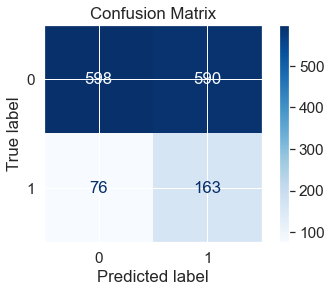

<Figure size 720x432 with 0 Axes>

None


In [59]:
print(logisticRegression(X_resampled, y_resampled, X_val, y_val))